In [6]:
from __future__ import division
import time
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
import pickle
import os.path
from zipfile import ZipFile
import sys, os
from os.path import join, dirname, abspath
from pathlib import Path
import classification as cl
import feature_selection as fs
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pickle
import os.path
from zipfile import ZipFile
import sys, os



In [7]:
def load_data():
    beta_file = os.path.realpath('../GSE59685_betas2.csv.zip')
    zipfile = ZipFile(beta_file)
    zipfile.getinfo('GSE59685_betas2.csv').file_size += (2 ** 64) - 1
    betaqn = pd.read_csv(zipfile.open('GSE59685_betas2.csv'),skiprows=(1,2), index_col=0,sep=',')
    betaqn = betaqn.T

    info = pd.read_csv('info.csv.zip',index_col=1, compression='zip',sep=',')
    info = info.drop('Unnamed: 0', 1)

    info.loc[(info.braak_stage=='5') | (info.braak_stage=='6'),'braak_bin'] = 1
    cond = ((info.braak_stage=='0') | (info.braak_stage=='1') | (info.braak_stage=='2') |
            (info.braak_stage=='3') | (info.braak_stage=='4'))
    info.loc[cond ,'braak_bin'] = 0
    info.loc[info.source_tissue == 'entorhinal cortex', 'tissue'] = 'EC'
    info.loc[info.source_tissue == 'whole blood', 'tissue'] = 'WB'
    info.loc[info.source_tissue == 'frontal cortex', 'tissue'] = 'FC'
    info.loc[info.source_tissue == 'superior temporal gyrus', 'tissue'] = 'STG'
    info.loc[info.source_tissue == 'cerebellum', 'tissue'] = 'CER'
    return (betaqn, info)

In [8]:
betaqn, info = load_data()

In [41]:
tissue = 'STG'

In [42]:
save_file = os.path.realpath('../data_str_pr_general/')
iters_big = 10
iters_small = 30
big_small = 200
feat_sel = 't_test'

ec = betaqn.loc[info[(info.tissue == tissue) & (info.braak_stage != 'Exclude')].index]
svm_accuracy = {}
samples = ec.shape[0]

features_num = [20]

features_file = save_file + "/features_%s_%s.p" % (tissue, feat_sel)
my_file = Path(features_file)
if my_file.is_file():
    features_per_i = pickle.load( open( features_file, "rb" ) )
else:
    print('no features file')



In [43]:
num = 20
i=0

In [44]:
train_full = ec.loc[ec.index != ec.index[i]]
train = train_full[features_per_i[i][0:num]]
test = ec.loc[ec.index == ec.index[i]]
test = test[features_per_i[i][0:num]]
y_train = info['braak_bin'].loc[train.index]
y_test = info['braak_bin'].loc[test.index]
train.shape  

(112, 20)

In [45]:
pca = PCA(n_components=2)
pca.fit(train)
train = pca.transform(train)
test = pca.transform(test)
test[0][1]

0.0032056845268712609

/Users/DianaCarolina/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 113 but corresponding boolean dimension is 112
  # Remove the CWD from sys.path while we load stuff.
/Users/DianaCarolina/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 113 but corresponding boolean dimension is 112
  # This is added back by InteractiveShellApp.init_path()


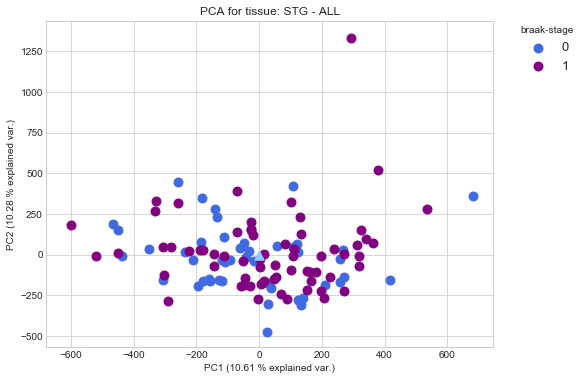

In [46]:
labels = y_train
labels = np.array(labels)
ec1 = StandardScaler().fit_transform(ec)
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(ec1)
target_names = ['0','1']
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for c, i, target_name in zip(['royalblue','purple'],[0,1], target_names, ):
        plt.scatter(x=plot_columns[labels==i,0],
                    y=plot_columns[labels==i,1],
                    c=c, label=target_name, s=80)
    if(int(y_test)==0.0):
        plt.scatter(test[0][0],test[0][1],marker='^', color='lightskyblue',s=90)
    else:
        plt.scatter(test[0][0],test[0][1],marker='s', color='salmon',s=90)
    plt.xlabel('PC1 (%.2f %% explained var.)' % (pca_2.explained_variance_ratio_[0] * 100))
    plt.ylabel('PC2 (%.2f %% explained var.)' % (pca_2.explained_variance_ratio_[1] * 100))
    plt.legend(title='braak-stage', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=13)
    plt.title('PCA for tissue: %s - ALL' %tissue)
    plt.show()

In [59]:
num = 20
i=3

In [60]:
train_full = ec.loc[ec.index != ec.index[i]]
train = ec[features_per_i[i][0:num]]
test = ec.loc[ec.index == ec.index[i]]
test = test[features_per_i[i][0:num]]
y_train = info['braak_bin'].loc[train.index]
y_test = info['braak_bin'].loc[test.index]
test

,cg06432309,rs133860,cg09449747,cg04234412,cg25445671,cg22666875,cg01500431,cg05380919,cg02299007,cg11478607,cg24336839,cg15254640,cg24238852,rs10882854,cg24861399,cg14061270,cg01502466,cg20064778,cg24697097,cg09284209
barcode,,,,,,,,,,,,,,,,,,,,
6042316103_R03C01,0.514871,0.518281,0.707984,0.288752,0.632144,0.820264,0.89715,0.874462,0.863026,0.05457,0.052856,0.055718,0.077283,0.502456,0.11925,0.620936,0.150131,0.074736,0.561142,0.850799


In [61]:
pca = PCA(n_components=2)
pca.fit(train)
train = pca.transform(train)
test = pca.transform(test)
test[0][0]

-0.23192603142222395

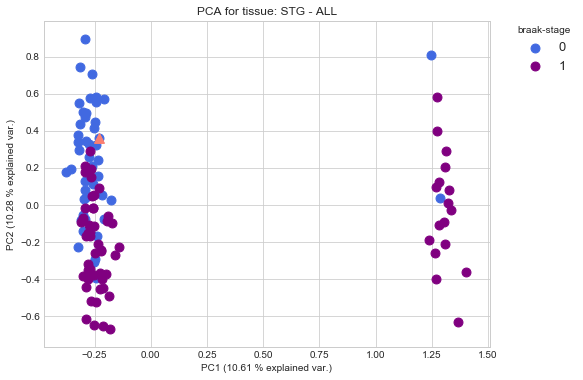

In [62]:
labels = y_train
labels = np.array(labels)
plot_columns = train
target_names = ['0','1']
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for c, i, target_name in zip(['royalblue','purple'],[0,1], target_names, ):
        plt.scatter(x=plot_columns[labels==i,0],
                    y=plot_columns[labels==i,1],
                    c=c, label=target_name, s=80)
        plt.scatter(test[0][0],test[0][1],marker='^', color='salmon',s=90)
    plt.xlabel('PC1 (%.2f %% explained var.)' % (pca_2.explained_variance_ratio_[0] * 100))
    plt.ylabel('PC2 (%.2f %% explained var.)' % (pca_2.explained_variance_ratio_[1] * 100))
    plt.legend(title='braak-stage', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=13)
    plt.title('PCA for tissue: %s - ALL' %tissue)
    plt.show()

In [104]:
save_file = os.path.realpath('../data_str_pr_general/')
tissue = 'EC'
feat_sel = 't_test'
predictionsNOW = pickle.load( open( save_file + "/pred_%s_%s_%d.p" %(tissue, feat_sel, num), "rb" ) )

In [94]:
i

1

In [38]:
save_file = os.path.realpath('../DATA/t_test')
tissue = 'EC'
feat_sel = 't_test'
predictionsBEF = pickle.load( open( save_file + "/pred_%s_%s_%d.p" %(tissue, feat_sel, num), "rb" ) )

In [62]:
np.vstack((y_tr,predictionsNOW['y_rbf'],predictionsBEF['y_rbf'],predictionsBEF['y_lin'],predictionsBEF['y_poly'])).T

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  1.,  1.],
       [ 0.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  1.,  1.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  0.],
       [ 1.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  1.,  0.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 0.,  1.,  1.,  1.,  1.],
       [ 1.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  1.,  0.,  1.],
       [ 1.,  1.,  1.,  0.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  0.,  0.,  0.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  

In [195]:
sum(1-abs(np.array(y_tr)-np.array(predictionsNOW['y_rbf'])))/104

0.56730769230769229

In [31]:
def SVM_rbf(train, y_train, test,C_range = np.logspace(-2, 10, 13),gamma_range = np.logspace(-9, 3, 13)):
    #C_range = np.logspace(-2, 10, 13)
    #gamma_range = np.logspace(-9, 3, 13)
    #C_range = np.logspace(-2, 10, 6)
    #gamma_range = np.logspace(-6, 3, 8)
    #rbf
    print('SVM-rbf')
    param_grid = [{'C': C_range, 'gamma': gamma_range, 'kernel': ['rbf']}]

    svr = svm.SVC(random_state=1234)
    clf = GridSearchCV(svr, param_grid, cv=5, verbose=1)
    clf.fit(train, y_train)
    y_rbf = clf.predict(test)[0]
    c_rbf = clf.best_params_['C']
    gamma_rbf = clf.best_params_['gamma']
    return (y_rbf, c_rbf, gamma_rbf)